# Exemplo de cálculo de interferência

In [1]:
using Plots
#gr(size=(900,600), html_output_format=:png)
#pyplot()
gr(html_output_format=:png)


Plots.GRBackend()

In [2]:
myrand(n, xmin=0.0, xmax=1.0) = xmin .+ rand(n) * (xmax-xmin)
    

myrand (generic function with 3 methods)

In [13]:
include("TreeAerodynamics.jl")

Main.TreeAerodynamics

In [14]:
uoofun(x,y) = (1.0, 0.0)
nb = 2
D0 = 1.0
D = [1.0, 1.0]
Cd = [1.2, 1.2]
xc = [0.0, 0.0]
yc = [-2.0, 2.0]
η1 = [0.0, 0.1, 0.25, 0.40, 0.55, 0.7, 0.849, 1.0, 1.15, 1.30, 1.45, 1.6, 1.8, 2, 2.5, 3, 3.5, 4, 5];
x1 = x = TA.geomseq(D0/2, 200*D0, 40, 1.12); 

In [15]:
branches = [TA.Branch2d(D[i], Cd[i], xc[i], yc[i]) for i in 1:nb]
wm = [TA.WakeModel2d(TA.dragcoeff(b), b.D) for b in branches]
wakes = [TA.wake2d(w, x1, η1) for w in wm];
#ux,uy = TA.wakeinterference(wakes, branches, uoofun; maxiter=2000, err=1e-4, rlx=0.02)
ux, uy, niter= TA.fixedwakeinterference(wakes, branches, uoofun; maxiter=2000, err=1e-6, rlx=0.2)

1; 0.02695294444031763
2; 0.021551689787046285
3; 0.017233387570009587
4; 0.013780702623530617
5; 0.011019989260912622
6; 0.008812482457292773
7; 0.007047274476523223
8; 0.005635711710613833
9; 0.004506922393969756
10; 0.00360424556584547
11; 0.002882378774045031
12; 0.002305099289029576
13; 0.0018434431474559296
14; 0.0014742498088383751
15; 0.0011789988673267839
16; 0.0009428801136505023
17; 0.0007540500768511219
18; 0.0006030376118410993
19; 0.0004822686274649525
20; 0.00038568605915570084
21; 0.00030844598885226143
22; 0.0002466746477290255
23; 0.0001972740995641771
24; 0.00015776684966009244
25; 0.00012617158001666448
26; 0.00010090377478124551
27; 8.069624974208281e-5
28; 6.453559876903533e-5
29; 5.161136894920107e-5
30; 4.127541489060485e-5
31; 3.300939340083672e-5
32; 2.639876813866418e-5
33; 2.111202041264401e-5
34; 1.6884023447960583e-5
35; 1.3502746281857797e-5
36; 1.0798620451293872e-5
37; 8.636036191202179e-6
38; 6.906541665616106e-6
39; 5.523404166554724e-6
40; 4.41726052

([0.997952, 0.997952], [-0.0269068, 0.0269068], 47)

In [ ]:
r = 1:20
for i = 1:nb
    plot(xw[i][r], yw[i][r], "r-")
end


In [16]:
η1 = [0.0, 0.1, 0.25, 0.40, 0.55, 0.7, 0.849, 1.0, 1.15, 1.30, 1.45, 1.6, 1.8, 2, 2.5, 3, 3.5, 4, 5];
#η1 = [0.4, 0.849, 1.3];
x1 = x = TA.geomseq(D0/2, 200*D0, 40, 1.12); 

In [22]:
nb = 10
D0 = 1.0
D = fill(D0, nb)
Cd = fill(0.35, nb)

xc = myrand(nb, 1, 10)
yc = myrand(nb, 1, 10)

nw = length(x1)
uoofun(x,y) = (1.0, 0.0)


uoofun (generic function with 1 method)

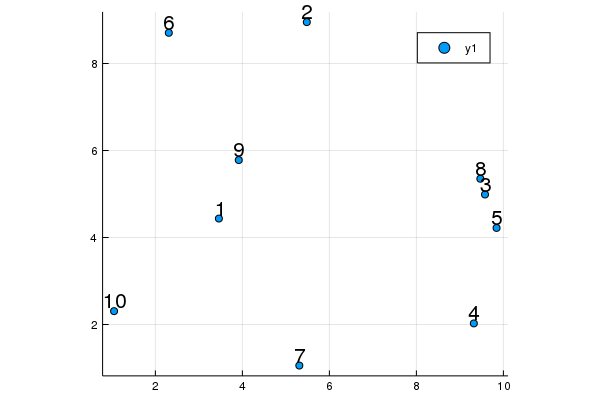

In [31]:
scatter(xc, yc, aspect_ratio=1.0)

annotate!(xc, yc, 1:nb, :bottom)


In [24]:
include("TreeAerodynamics.jl")

Main.TreeAerodynamics

In [25]:
branches = [TA.Branch2d(D[i], Cd[i], xc[i], yc[i]) for i in 1:nb]
wm = [TA.WakeModel2d(TA.dragcoeff(b), b.D) for b in branches]
wakes = [TA.wake2d(w, x1, η1) for w in wm];

xw = [wakes[i].xw .+ branches[i].xc for i in 1:nb]
yw = [fill(branches[i].yc, length(wakes[i].xw)) for i in 1:nb]

xwo = [wakes[i].xw .+ branches[i].xc for i in 1:nb]
ywo = [fill(branches[i].yc, length(wakes[i].xw)) for i in 1:nb];

Ux = zeros(nb)
Uy = zeros(nb)

nb = length(branches)

10

In [26]:
Ux, Uy, niter = TA.fixedwakeinterference(wakes, branches, uoofun; maxiter=2000, err=1e-6, rlx=0.2)

1; 0.16713789378757027
2; 0.13197892893428875
3; 0.10423598917206867
4; 0.08234041592141095
5; 0.06505639070980596
6; 0.051410055698655865
7; 0.04063379435582426
8; 0.03212241309938779
9; 0.025398669066256097
10; 0.02008614079870441
11; 0.015887870561137274
12; 0.012569545196494891
13; 0.009946247329706503
14; 0.007872016317154729
15; 0.006231621122866127
16; 0.004946875074862356
17; 0.00392938303181789
18; 0.0031216592052932812
19; 0.0024803594980771226
20; 0.00197111570367392
21; 0.0015666727080247966
22; 0.0012454131221402154
23; 0.0009901885862180215
24; 0.0007873938610495346
25; 0.0006262331614153016
26; 0.0004981387325824205
27; 0.0003963100114410256
28; 0.0003153483110830413
29; 0.00025096718701855814
30; 0.00019976277324185165
31; 0.00015903164493280553
32; 0.00012662635174742753
33; 0.00010084081382932819
34; 8.031939432395774e-5
35; 6.398474637392404e-5
36; 5.098054960750442e-5
37; 4.062605675259068e-5
38; 3.23800092296711e-5
39; 2.581198622797487e-5
40; 2.0579652494467915e-5

([0.976091, 0.846026, 0.871755, 0.87218, 0.859956, 0.975126, 0.996045, 0.84066, 0.988648, 0.968799], [-0.0137415, 0.0368811, 0.0253102, -0.0451939, -0.0485541, 0.0274516, -0.0308349, 0.0351131, 0.0243951, -0.0178876], 54)

In [32]:
hcat(1:nb, Ux, Uy)

10×3 Array{Float64,2}:
  1.0  0.976091  -0.0137415
  2.0  0.846026   0.0368811
  3.0  0.871755   0.0253102
  4.0  0.87218   -0.0451939
  5.0  0.859956  -0.0485541
  6.0  0.975126   0.0274516
  7.0  0.996045  -0.0308349
  8.0  0.84066    0.0351131
  9.0  0.988648   0.0243951
 10.0  0.968799  -0.0178876

In [ ]:
niter = TA.wakeinterference!(1, nn, wakes, branches, xw, yw, xwo, ywo, Ux, Uy, uoofun; maxiter=1, err=1e-3, rlx=0.99, rlxu=0.99, Lerr=10.0)



In [ ]:
r = 1:20
p = scatter(xc, yc;aspect_ratio=1)

for i = 1:nn
    plot!(p, xw[i][r], yw[i][r], aspect_ratio=1)
end


In [ ]:
Uy

In [ ]:
r = 1:10
for i = 1:nb
    plot(xw[i][r], yw[i][r], "r-")
    plot(xw1[i][r], yw1[i][r], "b--")
end


In [ ]:
ux1 = copy(Ux)
uy1 = copy(Uy)
xw1 = [copy(x) for x in xw]
yw1 = [copy(x) for x in yw];


In [ ]:
wakes[1].xw